# Problem Set 4

### MACS 30150
### Author: Songrun He

### Problem 1

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.stats import chi2

In [2]:
dt = np.loadtxt('data/incomes.txt')

In [3]:
dt

array([ 51253.49715631, 100630.32024137,  83009.27613739,  82882.10654304,
        77338.29483892,  81071.64131675,  84760.04353269,  74599.0967193 ,
        94687.36110452,  76720.48678222,  84669.65776296,  79707.04914362,
       100026.64050846,  89828.42639587,  74006.05604302, 103281.1855776 ,
        88586.79236711, 133631.92813961,  91519.53047238, 106863.33198279,
        89622.32208316,  63803.24097245,  99116.670934  , 135865.02679613,
        61344.18577082,  99182.27630779,  55038.04861413,  71353.56078829,
        90880.19896459,  80950.37075039,  84724.93806271,  91236.88284731,
        91628.21297882, 105243.4671147 ,  71500.93550933,  56162.05440841,
        78935.2939267 ,  81097.09361259, 130354.71406191, 112159.02216504,
        82259.96409801,  75699.52604273,  71699.30209176,  93487.89133203,
       120723.60773086, 113045.98795795,  70752.04409433, 103679.41128338,
        62517.62724779,  70780.7133676 , 112840.45723451,  65532.50301185,
        69456.26059752,  

### (a)

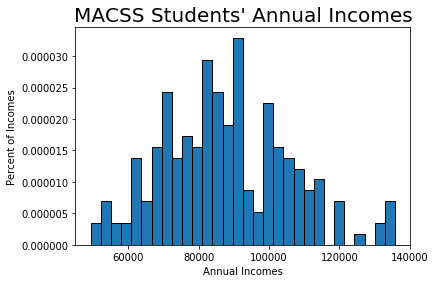

In [4]:
bins = 30
plt.hist(dt, bins, density=True, edgecolor = 'k')
plt.title('MACSS Students\' Annual Incomes', fontsize = 20)
plt.xlabel('Annual Incomes')
plt.ylabel('Percent of Incomes')
plt.show()

### (b)

Log likelihood of the income data:  -2385.856997808558


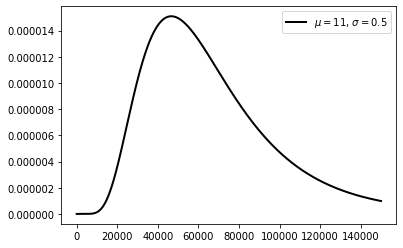

In [5]:
from scipy.stats import lognorm

N_vec = np.linspace(1e-9, 150000, 400000)
mu = 11
sigma = 0.5
plt.plot(N_vec, lognorm.pdf(N_vec, s = abs(sigma), scale = np.exp(mu)), linewidth = 2,\
         color = 'k', label = '$\mu=11$, $\sigma=0.5$')
plt.legend(loc='upper right')

def log_lik_lognorm(xvals, mu, sigma):
    pdf = lognorm.pdf(xvals, s = abs(sigma), scale = np.exp(mu))
    log_pdf = np.log(pdf)
    val = log_pdf.sum()
    return val

print('Log likelihood of the income data: ', log_lik_lognorm(dt, mu, sigma))

### (c)

In [17]:
def crit(params, *args):
    mu, sigma = params
    dt = args
    return -log_lik_lognorm(dt, mu, sigma)

params_init = np.array([11,0.5])
results = opt.minimize(crit, params_init, args = dt)
mu_mle, sigma_mle = results.x
Cov_mat = results.hess_inv
val = -results.fun
print('The ML estimate for mu is', mu_mle)
print('The ML estimate for sigma is', sigma_mle)
print('The value of likelihood function is', val)
print('The variance covariance matrix is\n', Cov_mat)

The ML estimate for mu is 11.359022999950687
The ML estimate for sigma is 0.20817732206858106
The value of likelihood function is -2241.7193013573587
The variance covariance matrix is
 [[2.18365059e-04 7.09688808e-07]
 [7.09688808e-07 1.08153259e-04]]


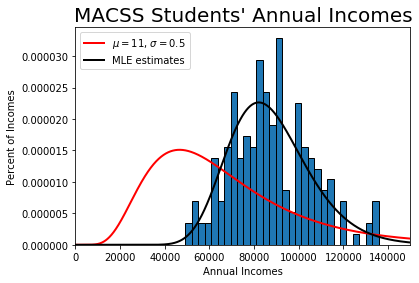

In [18]:
bins = 30
# Plot the histogram from part (a)
plt.hist(dt, bins, density=True, edgecolor = 'k')
plt.title('MACSS Students\' Annual Incomes', fontsize = 20)
plt.xlabel('Annual Incomes')
plt.ylabel('Percent of Incomes')
plt.xlim([1e-10, 150000])

# Plot the distribution in part(b)
N_vec = np.linspace(1e-9, 150000, 400000)
mu = 11
sigma = 0.5
plt.plot(N_vec, lognorm.pdf(N_vec, s = abs(sigma), scale = np.exp(mu)),\
         linewidth = 2, color = 'r', label='$\mu=11$, $\sigma = 0.5$')
plt.legend(loc = 'upper left')

# Plot the MLE estimate
mu = 11.36
sigma = 0.21
plt.plot(N_vec, lognorm.pdf(N_vec, s = abs(sigma), scale = np.exp(mu)),\
         linewidth = 2, color = 'k', label='MLE estimates')
plt.legend(loc = 'upper left')

### (d)

In [27]:
print('H0: mu = 11, sigma =0.5')
print('The log likelihood value of the hypothesis: ', log_lik_lognorm(dt, 11, 0.5))
print('The log likelihood value of MLE estimates: ', log_lik_lognorm(dt, mu_mle, sigma_mle))
LR = 2*(log_lik_lognorm(dt, mu_mle, sigma_mle)-log_lik_lognorm(dt, 11, 0.5))
print('The value of likelihood ratio is: ', LR)
p = 1 - chi2.cdf(LR, 2)
print('The p value of Likelihood ratio is: ', p)
print('Therefore, based on the liklihood ratio test, we reject the null hypothesis that mu = 11 and sigma =0.5.')

H0: mu = 11, sigma =0.5
The log likelihood value of the hypothesis:  -2385.856997808558
The log likelihood value of MLE estimates:  -2241.7193013573587
The value of likelihood ratio is:  288.2753929023984
The p value of Likelihood ratio is:  0.0
Therefore, based on the liklihood ratio test, we reject the null hypothesis that mu = 11 and sigma =0.5.


### (e)

In [29]:
p1 = 1 - lognorm.cdf(100000, s = sigma_mle, scale = np.exp(mu_mle))
p2 = lognorm.cdf(75000, s = sigma_mle, scale = np.exp(mu_mle))
print('The probability of earning more than 100000 is:', p1)
print('The probability of earning less than 75000 is:', p2)

The probability of earning more than 100000 is: 0.2298668415839762
The probability of earning less than 75000 is: 0.2602342650839342


### Problem 2

### (a)

In [32]:
df = pd.read_csv('data/sick.txt')
df

,sick,age,children,avgtemp_winter
0,1.67,57.47,3.04,54.10
1,0.71,26.77,1.20,36.54
2,1.39,41.85,2.31,32.38
3,1.37,51.27,2.46,52.94
4,1.45,44.22,2.72,45.90
5,0.62,44.67,1.20,68.60
6,1.06,27.92,1.84,29.42
7,1.29,44.87,2.40,50.49
8,1.05,53.68,1.65,55.12
9,1.18,39.63,1.96,37.30


In [87]:
def std_norm_pdf(val, sigma):
    sigma = abs(sigma)
    return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(val)**2 / (2*sigma**2)) 

def log_lik_norm(y, x1, x2, x3, beta0, beta1, beta2, beta3, sigma):
    eps = y - beta0 - beta1*x1 - beta2*x2 - beta3*x3
    pdf = std_norm_pdf(eps, sigma)
    #pdf += 1e-10
    return np.log(pdf).sum()
    
def crit_reg(params, *args):
    beta0, beta1, beta2, beta3, sig = params
    y, x1, x2, x3 = args
    log_lik = log_lik_norm(y, x1, x2, x3, beta0, beta1, beta2, beta3, sig)
    return -log_lik

In [84]:
beta0_i, beta1_i, beta2_i, beta3_i, sigma_i = (0.2,0,0.5,0,0.1)
y, x1, x2, x3 = df['sick'], df['age'], df['children'], df['avgtemp_winter']
params_i = np.array([beta0_i, beta1_i, beta2_i, beta3_i, sigma_i])
results = opt.minimize(crit_reg, params_i, (y, x1, x2, x3))

In [85]:
beta0_mle, beta1_mle, beta2_mle, beta3_mle, sigma_mle = results.x
for i in range(4):
    print('Beta',i, '=', results.x[i])
print('Sigma =', sigma_mle)
print('Value of the log likelihood function is:', -results.fun)
print('The varaince-covariance matrix is:\n', results.hess_inv)

Beta 0 = 0.25164262766464207
Beta 1 = 0.012933307068837413
Beta 2 = 0.40050273267382036
Beta 3 = -0.009991584014120562
Sigma = 0.0030177781682132437
Value of the log likelihood function is: 876.8650552792894
The varaince-covariance matrix is:
 [[ 7.29322435e-07  8.08096034e-09 -1.36147724e-07 -1.78729343e-08
   2.51253367e-08]
 [ 8.08096034e-09  3.00256043e-09 -2.56161221e-08 -2.02090952e-09
   3.84183589e-10]
 [-1.36147724e-07 -2.56161221e-08  2.55434797e-07  1.73388622e-08
  -5.91284756e-09]
 [-1.78729343e-08 -2.02090952e-09  1.73388622e-08  1.63287198e-09
  -6.35395867e-10]
 [ 2.51253367e-08  3.84183589e-10 -5.91284756e-09 -6.35395867e-10
   1.93615432e-08]]


### (b)

In [92]:
beta0_test, beta1_test, beta2_test, beta3_test, sigma_test = np.array([1, 0, 0, 0, 0.1])
log_lik_h0 = log_lik_norm(y, x1, x2, x3, \
                         beta0_test, beta1_test, beta2_test, beta3_test, sigma_test)
print('The log likelihood of null hypothesis:', log_lik_h0)
print('The log likelihood of MLE estimates:', results.fun)
print('The value of likelihood ratio:', 2*(results.fun - log_lik_h0))
p_new = 1 - chi2.cdf(2*(results.fun - log_lik_h0),5)
print('The p value of likelihood ratio test is:', p_new)
print('THerefore, we reject the null hypothesis,')

The log likelihood of null hypothesis: -2253.700688042125
The log likelihood of MLE estimates: -876.8650552792894
The value of likelihood ratio: 2753.671265525671
The p value of likelihood ratio test is: 0.0
THerefore, we reject the null hypothesis,


Based on the p value, there is almost close to 0% probability that age, number of children and average winter temperature have no effect on the number of sick days.